In [1]:
## Import libraries
import numpy as np
from IPython.display import clear_output

## Import custom modules
import sys
import os
# Append the parent directory to the sys.path
this_path = os.path.abspath('') 
parent_dir = os.path.dirname(this_path)  
sys.path.append(parent_dir)
from modules import bot_utils as drl, utils

### Kernel options

In [2]:
kernel_size = 3
h_symm = True
v_symm = True
fixed_center = True
kernel_prec = 0

bot = drl.Bot(kernel_size=kernel_size, 
              h_symm=h_symm, 
              v_symm=v_symm, 
              fixed_center=fixed_center, 
              kernel_prec=kernel_prec)
bot.kernel

array([[ 1., -1.,  1.],
       [-0.,  0., -0.],
       [ 1., -1.,  1.]], dtype=float32)

### Custom kernels

In [3]:
# Known
kernel_worms = np.array([[0.68, -0.9, 0.68], 
                        [-0.9, -0.66,  -0.9], 
                        [0.68,  -0.9, 0.68]])
kernel_waves = np.array([[0.563, -0.71, 0.563], 
                         [-0.71, 0.63, -0.71], 
                         [0.563, -0.71, 0.563]])
# Discovered
kernel_1 = np.array([[ 0.36,  0.82, -0.79],
                     [ 0.9,  -0.72, -0.38],
                     [-0.84, -0.92, -0.35]])
kernel_2 = np.array([[-0.1,  0.9, -0.1],
                     [ 0.5, -0.6,  0.5],
                     [-0.1,  0.9, -0.1]])
kernel_3 = np.array([[0.37, -0.06, 0.37],
                     [-0.44, -0.9, -0.44],
                     [-0.79,  0.07, -0.79]])

### Random Image

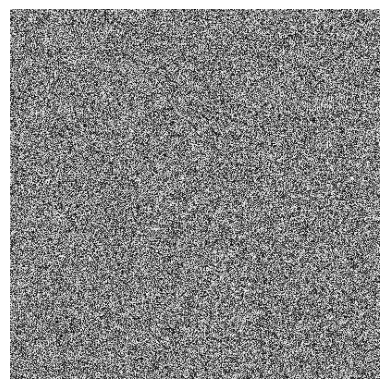

In [4]:
image = utils.random_image(size=(400,400))
utils.display_image(image)

### Pad and crop

In [5]:
padded_image = utils.apply_periodic_padding(image, kernel_size)
print('Shape padded image:', padded_image.shape)
cropped_image = utils.apply_crop(padded_image, kernel_size)
print('Shape cropped image:', cropped_image.shape)

Shape padded image: (406, 406)
Shape cropped image: (400, 400)


### Rewarder

In [6]:
desiderata = np.array([0.17, 0.17, 790])
rewarder = drl.Rewarder(desiderata=desiderata)
rewarder.update(image)
print('scales:', rewarder.scales)
print('observation:', rewarder.observation)
print('variance:', rewarder.variance)
print('reward:', rewarder.reward)

scales: [13, 7]
observation: [0.16663128 0.16679406 0.        ]
variance: [0.16663128 0.16679407]
reward: 0.48938538243811935


### Dynamics

kernel:
 [[-0.67  0.06 -0.67]
 [ 0.15  0.08  0.15]
 [-0.67  0.06 -0.67]]
observation: [0.3481906  0.316574   0.18871078]
reward: 0.036462376070116854


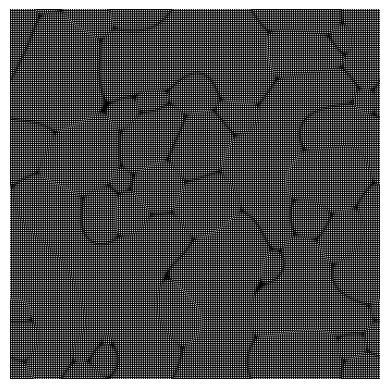

In [29]:
var1 = 0.3
var2 = 0.3
n_object = 1000
n_objects_transformed = np.tanh(n_object/1000.)
kernel_size = 3
h_symm = True
v_symm = True
fixed_center = False
activation = 'inv_gaussian'
kernel_prec = 2
scale_kernel = False
t_max = 1000
edge_len = 400
periodic = False

bot = drl.Bot(kernel_size=kernel_size,
              #kernel=kernel_worms,
              h_symm=h_symm, 
              v_symm=v_symm, 
              fixed_center=fixed_center,
              activation=activation, 
              kernel_prec=kernel_prec,
              scale_kernel=scale_kernel)
rewarder = drl.Rewarder(desiderata=desiderata, 
                        scales=(5, 30))
image = utils.random_image(size=(edge_len,edge_len), 
                           periodic=periodic)
env = drl.Environment(image=image, 
                      bot=bot, 
                      desiderata=desiderata,
                      max_timesteps=t_max,
                      rewarder=rewarder)

terminated = False
while not terminated:
    observation, reward, terminated, _, info = env.step()
    utils.display_image(env.image)
    clear_output(wait=True)

print('kernel:\n', bot.kernel)
print('observation:', observation)
print('reward:', reward)
utils.display_image(env.image)